### This notebook follows [Wenyan Deng's](https://wenyandeng.wordpress.com/2017/07/20/maps-of-sri-lankan-army-deaths-with-geopandas/) tutorial on GeoPandas mapping to add labels to a plot

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt


# Set initial plot size
plt.rcParams['figure.figsize'] = (30,30)

### Pull in a GeoJson

In [2]:
ca_counties = gpd.read_file('./data/caCountiesNoChannelIslands.geojson')

### Use Shapely's representative_point on the geometry column to create a coords column 

In [3]:
ca_counties['coords'] = ca_counties['geometry'].apply(lambda x: x.representative_point().coords[:])

In [4]:
ca_counties.head()

,COUNTYNS,GEOID,NAME,ALAND,AWATER,geometry,coords
0,00277302,06075,San Francisco,121485107,479107241,"(POLYGON ((-122.514483 37.780829, -122.509843 ...","[(-122.44571498093507, 37.757919)]"
1,00277320,06111,Ventura,4773302741,946030569,"(POLYGON ((-119.477837 34.379417, -119.473793 ...","[(-119.08346759895444, 34.4705965)]"
2,00277300,06071,San Bernardino,51948123813,123845007,"(POLYGON ((-117.802539 33.975551, -117.79111 3...","[(-116.1108099258065, 34.838412500000004)]"
3,00277286,06043,Mariposa,3752472156,36225644,"(POLYGON ((-120.394425 37.67504, -120.392504 3...","[(-119.95822376246338, 37.543434000000005)]"
4,01692767,06103,Tehama,7638228772,33767784,"(POLYGON ((-123.065426 40.286971, -123.060729 ...","[(-122.21216382568988, 40.125723)]"


### Coords column is a list so just set the column value to be the first value of the list

In [5]:
ca_counties['coords'] = [coords[0] for coords in ca_counties['coords']]

In [6]:
ca_counties.head()

,COUNTYNS,GEOID,NAME,ALAND,AWATER,geometry,coords
0,00277302,06075,San Francisco,121485107,479107241,"(POLYGON ((-122.514483 37.780829, -122.509843 ...","(-122.44571498093507, 37.757919)"
1,00277320,06111,Ventura,4773302741,946030569,"(POLYGON ((-119.477837 34.379417, -119.473793 ...","(-119.08346759895444, 34.4705965)"
2,00277300,06071,San Bernardino,51948123813,123845007,"(POLYGON ((-117.802539 33.975551, -117.79111 3...","(-116.1108099258065, 34.838412500000004)"
3,00277286,06043,Mariposa,3752472156,36225644,"(POLYGON ((-120.394425 37.67504, -120.392504 3...","(-119.95822376246338, 37.543434000000005)"
4,01692767,06103,Tehama,7638228772,33767784,"(POLYGON ((-123.065426 40.286971, -123.060729 ...","(-122.21216382568988, 40.125723)"


### Create a plot

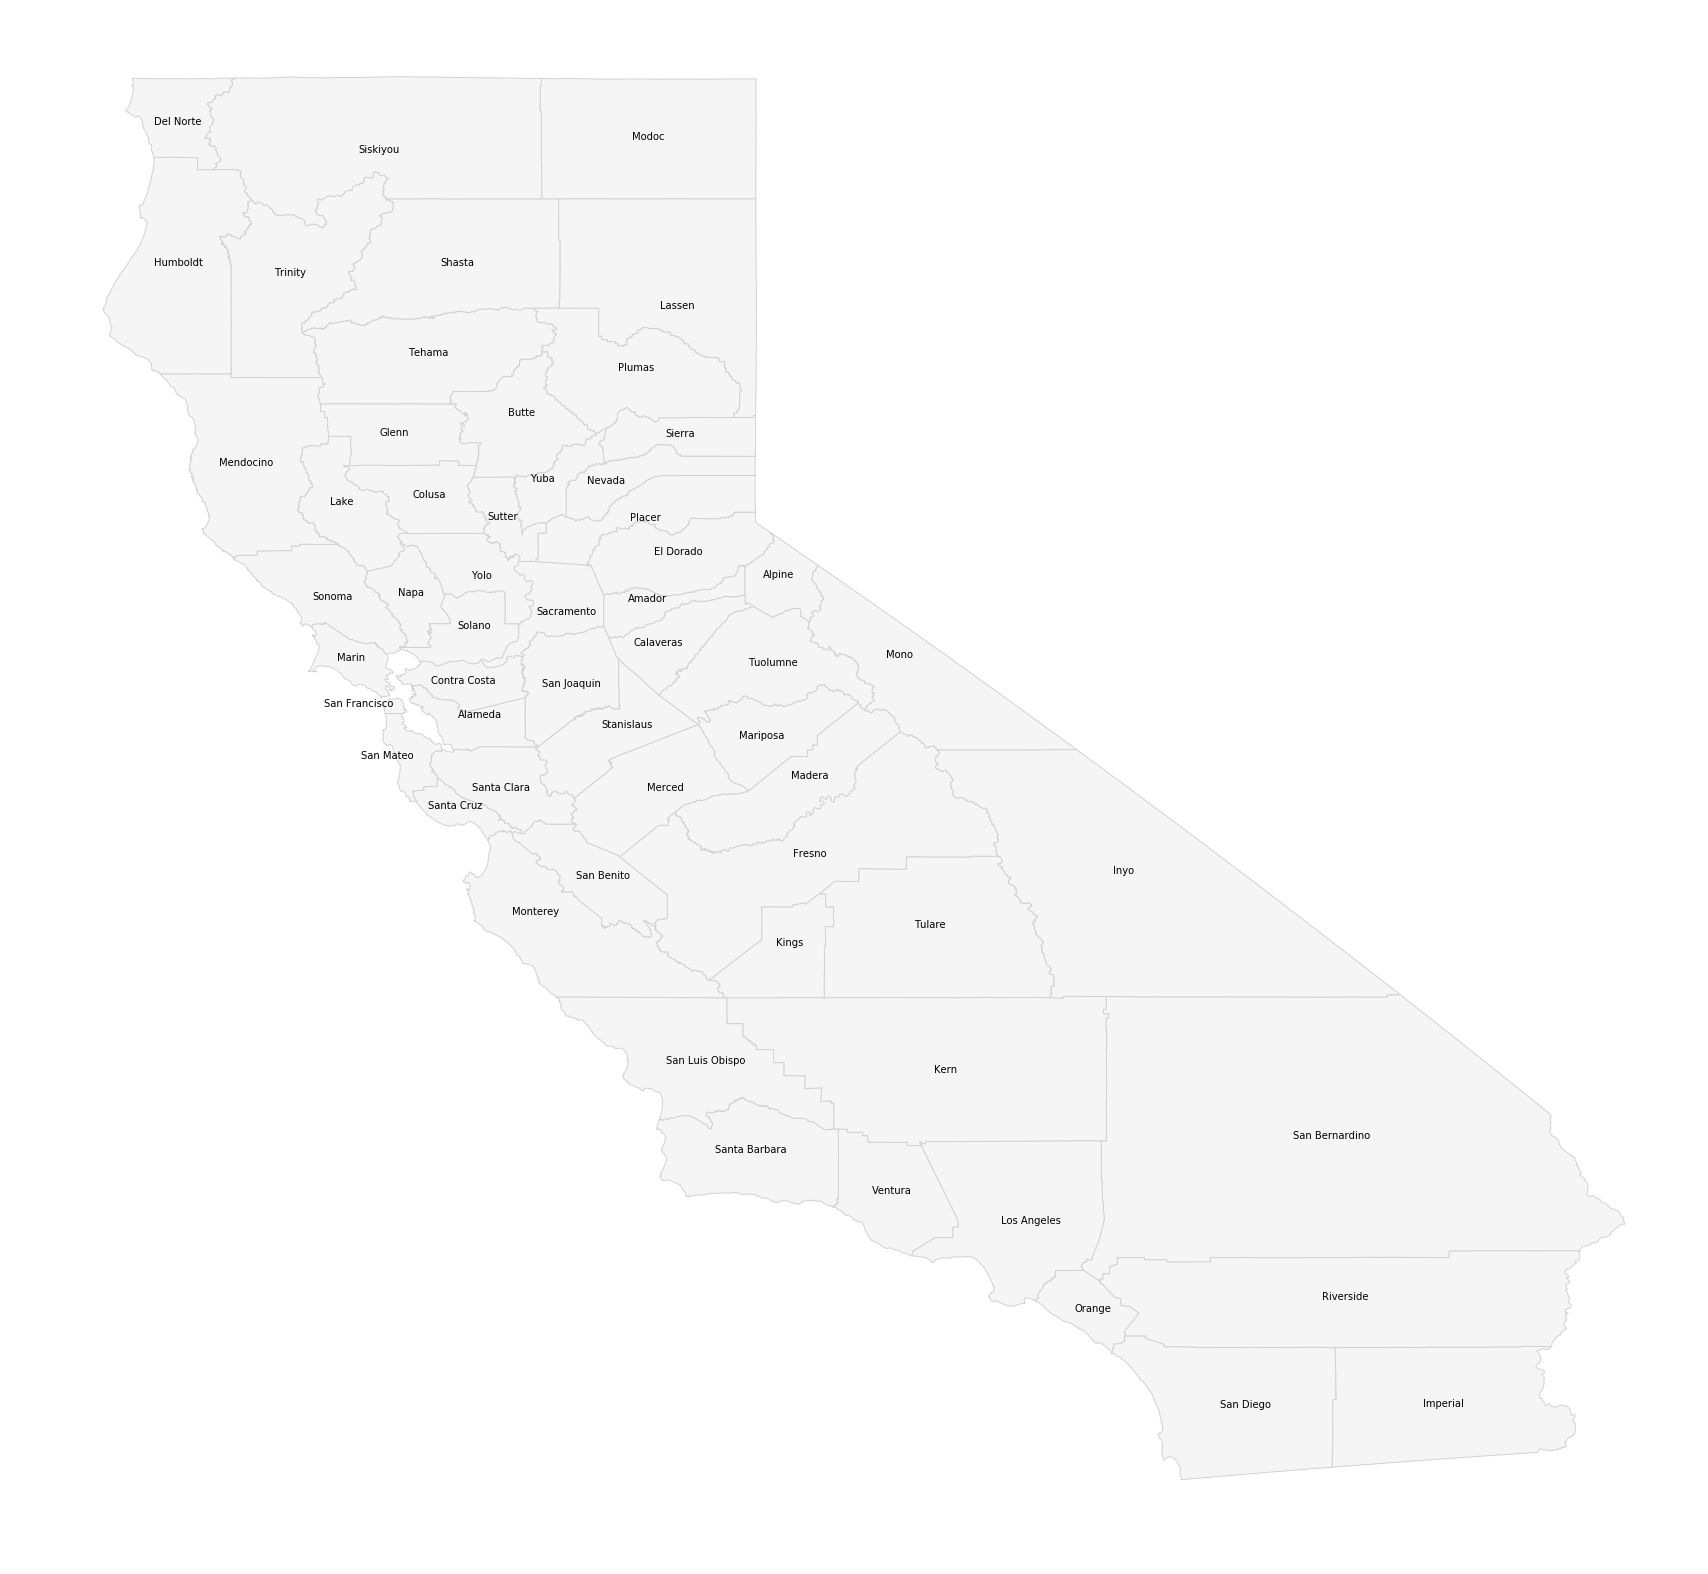

In [11]:
fig, ax = plt.subplots()

# EPSG 4269 works well for the labels, EPSG 3310 (CA Albers) led to the labels being clustered in the middle of the plot
county_map = ca_counties.to_crs(epsg=4269).plot(ax=ax, edgecolor='lightgrey',color='whitesmoke')
ax.set_axis_off()

for index, row in ca_counties.iterrows():
    if row['NAME'] != 'San Francisco' and row['NAME'] != 'San Mateo' :
        plt.annotate(s=row['NAME'], xy=row['coords'],horizontalalignment='center')
    elif row['NAME'] == 'San Francisco' or row['NAME'] == 'San Mateo' :
        plt.annotate(s=row['NAME'], xy=row['coords'],horizontalalignment='right')
plt.savefig('./data/output/caCounties.png')